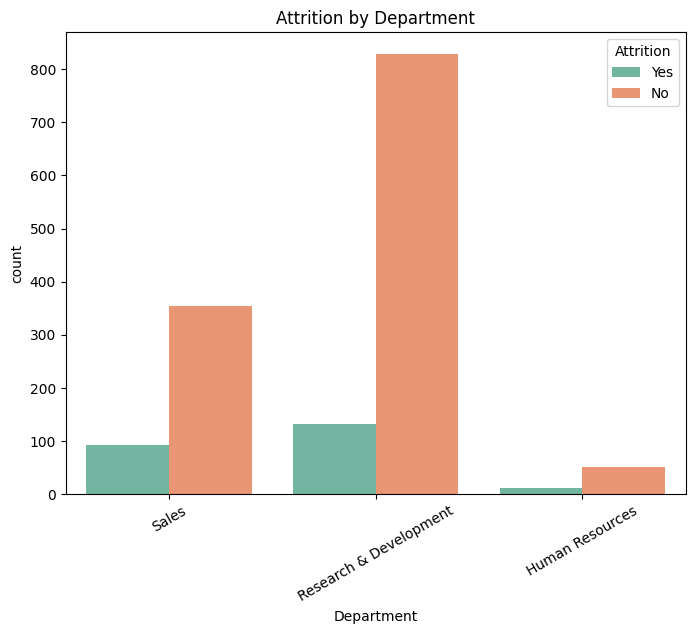

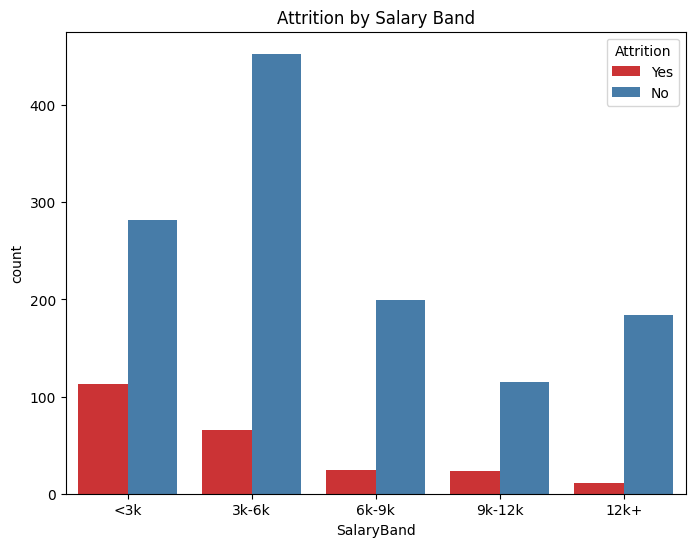

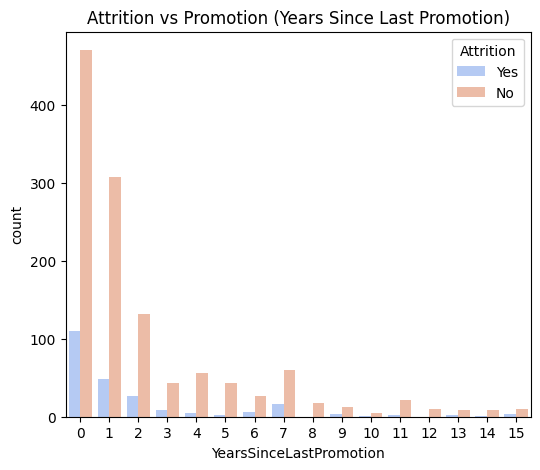

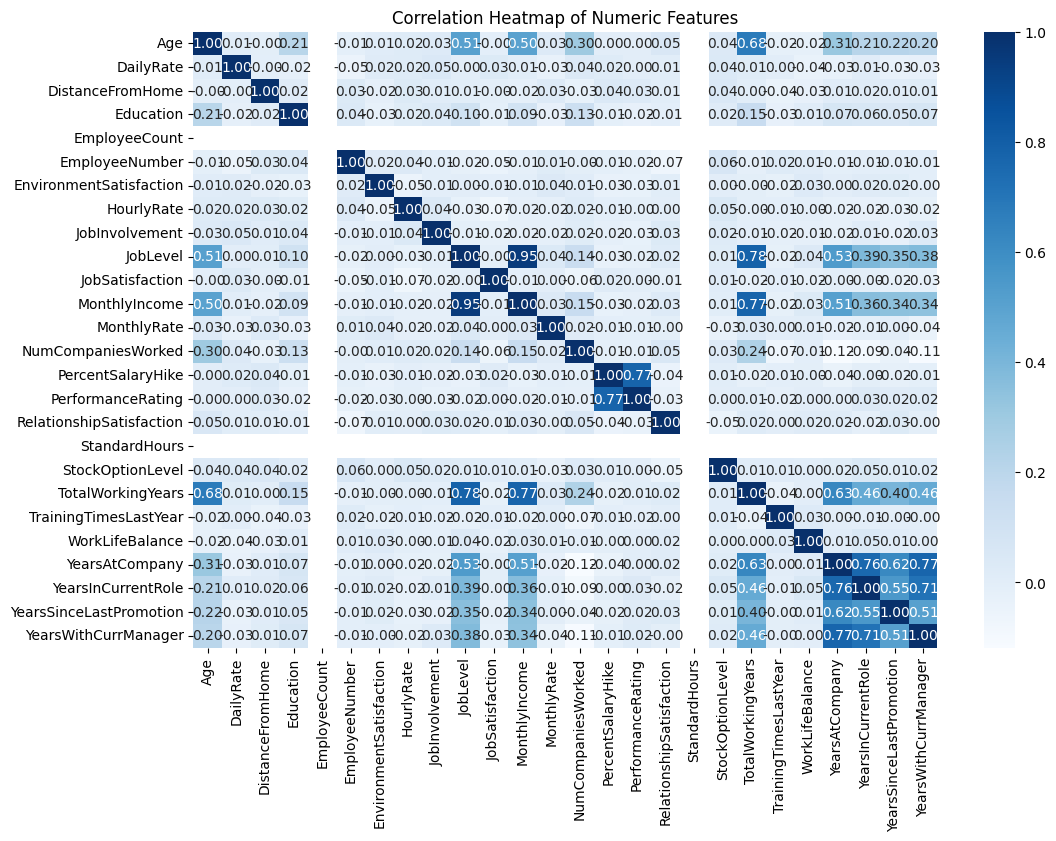

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("HR-Employee-Attrition.csv")

# -------------------------
# 1. Attrition by Department
# -------------------------
plt.figure(figsize=(8,6))
sns.countplot(x='Department', hue='Attrition', data=df, palette='Set2')
plt.title("Attrition by Department")
plt.xticks(rotation=30)
plt.show()

# -------------------------
# 2. Attrition by Salary Band
# -------------------------
# Create salary bands
df['SalaryBand'] = pd.cut(df['MonthlyIncome'],
                          bins=[0, 3000, 6000, 9000, 12000, df['MonthlyIncome'].max()],
                          labels=['<3k','3k-6k','6k-9k','9k-12k','12k+'])

plt.figure(figsize=(8,6))
sns.countplot(x='SalaryBand', hue='Attrition', data=df, palette='Set1')
plt.title("Attrition by Salary Band")
plt.show()

# -------------------------
# 3. Attrition vs Promotion
# -------------------------
plt.figure(figsize=(6,5))
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=df, palette='coolwarm')
plt.title("Attrition vs Promotion (Years Since Last Promotion)")
plt.show()

# -------------------------
# 4. Correlation Heatmap
# -------------------------
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [2]:
# Step 1: Load Data
import pandas as pd

# Load dataset
df = pd.read_csv("HR-Employee-Attrition.csv")

# Quick check
print(df.shape)
print(df.head())
print(df.info())
print(df['Attrition'].value_counts())  # target variable distribution


# Step 2: Preprocess
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Features & Target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


(1470, 35)
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLeve

Logistic Regression Accuracy: 0.891156462585034
[[249   6]
 [ 26  13]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294

Decision Tree Accuracy: 0.8299319727891157
[[238  17]
 [ 33   6]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       255
           1       0.26      0.15      0.19        39

    accuracy                           0.83       294
   macro avg       0.57      0.54      0.55       294
weighted avg       0.80      0.83      0.81       294



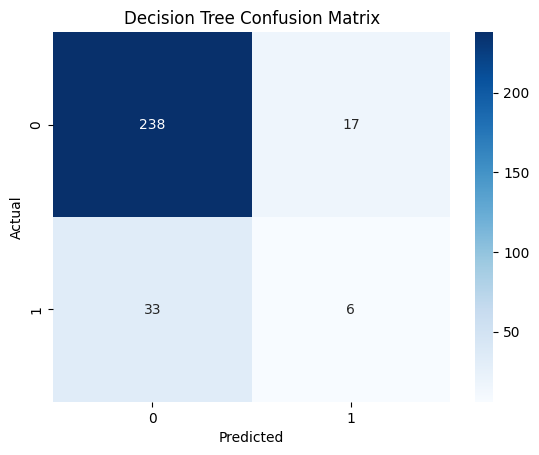

In [10]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load dataset
df = pd.read_csv("HR-Employee-Attrition.csv")

# Step 3: Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Step 4: Define Features and Target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Step 5: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 7: Logistic Regression (with solver adjustment)
log_model = LogisticRegression(solver='liblinear', max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Step 8: Decision Tree
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Step 9: Visualize Decision Tree Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()


🔍 SHAP Summary Plot - Logistic Regression


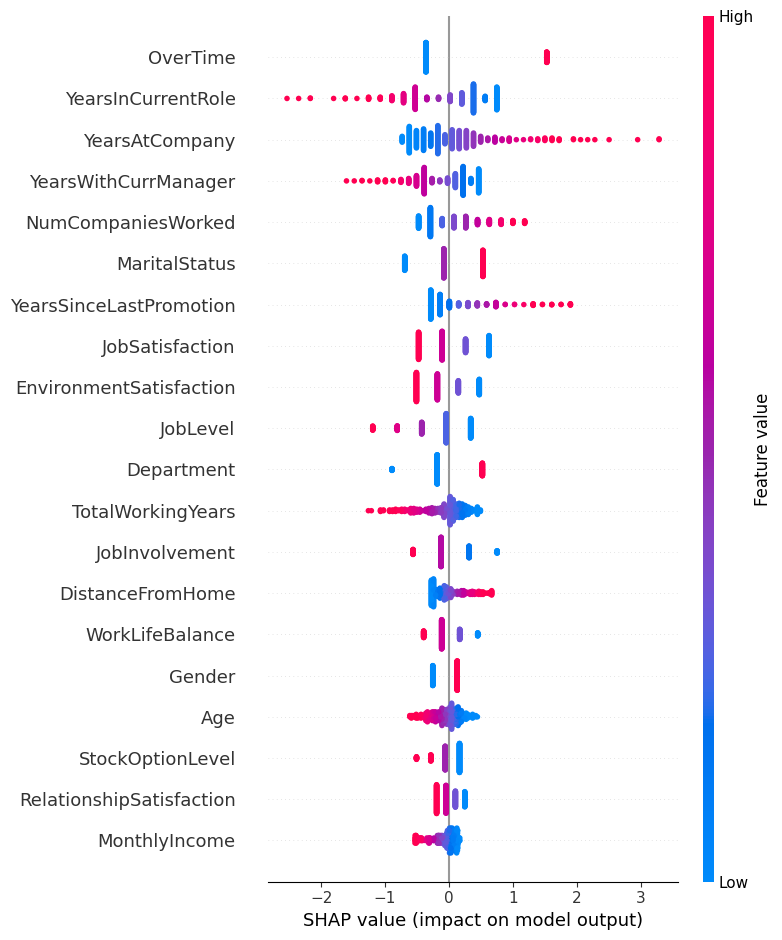

🔍 SHAP Summary Plot - Decision Tree


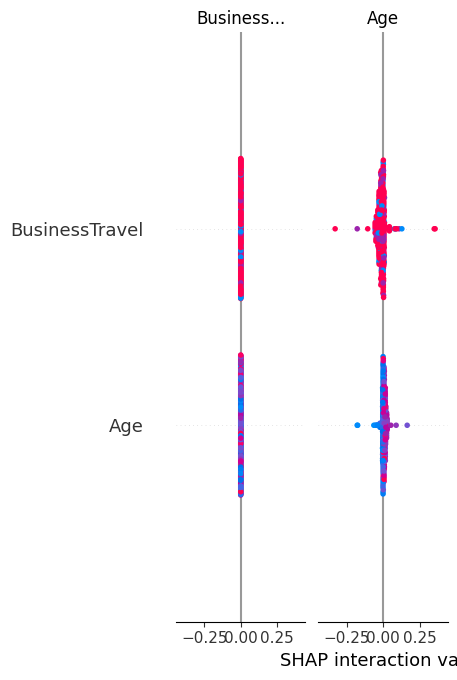

🔍 SHAP Force Plot - Logistic Regression (First Test Sample)


In [9]:
import shap

# Initialize SHAP explainer for Logistic Regression
explainer_log = shap.Explainer(log_model, X_train)
shap_values_log = explainer_log(X_test)

# Initialize SHAP explainer for Decision Tree
explainer_tree = shap.Explainer(tree_model, X_train)
shap_values_tree = explainer_tree(X_test)

# SHAP Summary Plot for Logistic Regression
print("🔍 SHAP Summary Plot - Logistic Regression")
shap.summary_plot(shap_values_log, X_test, feature_names=X.columns)

# SHAP Summary Plot for Decision Tree
print("🔍 SHAP Summary Plot - Decision Tree")
shap.summary_plot(shap_values_tree, X_test, feature_names=X.columns)

# SHAP Force Plot for First Prediction (Logistic Regression)
print("🔍 SHAP Force Plot - Logistic Regression (First Test Sample)")
shap.initjs()
shap.force_plot(shap_values_log[0])
